# Title of project

The purpose of this notebook is to provide a template for data science use cases, primarily for exploration and self-education. It is also a sandbox for miscellaneous code.

In [1]:
import sys
import time
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from sklearn.datasets import fetch_covtype
from ydata_profiling import ProfileReport

In [2]:
%matplotlib inline
pd.set_option("display.max_columns", None)
rng = np.random.default_rng(12345)
sns.set_context("notebook")
sns.set_palette("colorblind")

# Explore and visualize data

In [3]:
# Generate a df with continuous, ordinal, and binary variables
nrows, ncols = 100, 5
df_example = pd.DataFrame(
    rng.random((nrows, ncols)), columns=["a", "b", "c", "d", "e"]
).assign(
    f_ordinal=rng.choice([0, 1, 2, 3], nrows), g_binary=rng.choice([True, False], nrows)
)

# randomly set missing values to 10% of them to make it more challenging/realistic
bool_mask_mv = rng.choice([True, False], df_example.shape, p=[0.1, 0.9])
df_example = df_example.mask(bool_mask_mv)

# Export and import data -------
# save data
# df_example.to_csv(Path("data", "example_data.csv"), index=False)

# edit to read a saved file
# df_example = pd.read_csv(Path('data', 'example_data.csv'))

print(df_example.shape)
df_example.head()

(100, 7)


,a,b,c,d,e,f_ordinal,g_binary
0,0.227336,0.316758,0.797365,0.676255,0.391110,2.0,True
1,0.332814,0.598309,0.186734,0.672756,0.941803,2.0,False
2,0.248246,0.948881,0.667237,NaN,0.441840,3.0,True
3,0.886480,0.697453,0.326473,0.733928,0.220135,3.0,True
4,0.081595,0.159896,0.340100,0.465193,0.266421,2.0,False


In [4]:
df_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   a          94 non-null     float64
 1   b          92 non-null     float64
 2   c          88 non-null     float64
 3   d          89 non-null     float64
 4   e          89 non-null     float64
 5   f_ordinal  90 non-null     float64
 6   g_binary   90 non-null     object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [5]:
# use pandas profiling for fast exploration
# profile = ProfileReport(df_example, title="Profiling Report")
# profile

# Visualize data

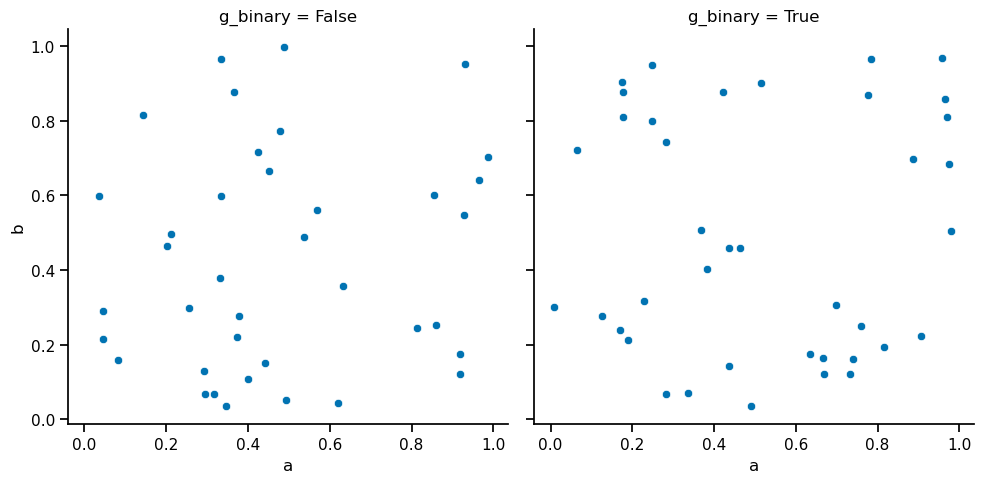

In [6]:
g = sns.relplot(data=df_example, x="a", y="b", col="g_binary", kind="scatter")
g

In [7]:
rng = np.random.default_rng()
rng.choice(["LA", "SD", "SF"], p=[1 / 3, 1 / 3, 1 / 3], size=10)

array(['SD', 'SF', 'SF', 'SF', 'SF', 'LA', 'SF', 'SF', 'SD', 'SD'],
      dtype='<U2')

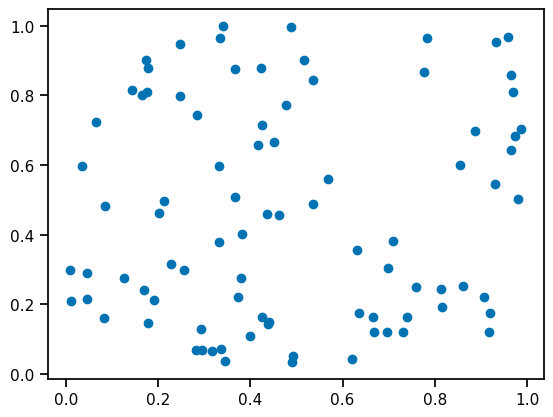

In [8]:
plt.scatter(df_example["a"], df_example["b"])

# Child development dataset

Picked a dataset of interest for some manipulations and visualizations

In [9]:
gh_url_stem = "https://raw.githubusercontent.com/dqsis/child-growth-charts/refs/heads/master/data/"
fn_stems = ["age_headc", "age_length", "age_weight"]
genders = ["b", "g"]

dfs_list = list()
for fn_stem in fn_stems:
    for gender in genders:
        fn = f"{gender}_{fn_stem}.csv"
        data_df = pd.read_csv(f"{gh_url_stem}{fn}").assign(
            gender=gender, measurement=fn_stem
        )
        dfs_list.append(data_df)
data_df = pd.concat(dfs_list)
data_df.head()

,Month,2nd (2.3rd),5th,10th,25th,50th,75th,90th,95th,98th (97.7th),gender,measurement
0,0,31.92128,32.37241,32.83389,33.60502,34.4618,35.31858,36.08971,36.55119,37.002324,b,age_headc
1,1,34.94019,35.35495,35.77923,36.48819,37.2759,38.06361,38.77257,39.19685,39.611608,b,age_headc
2,2,36.78314,37.19961,37.62565,38.33754,39.1285,39.91946,40.63135,41.05739,41.473862,b,age_headc
3,3,38.14913,38.56898,38.99847,39.71613,40.5135,41.31087,42.02853,42.45802,42.877868,b,age_headc
4,4,39.24371,39.66775,40.10153,40.82636,41.6317,42.43704,43.16187,43.59565,44.019694,b,age_headc


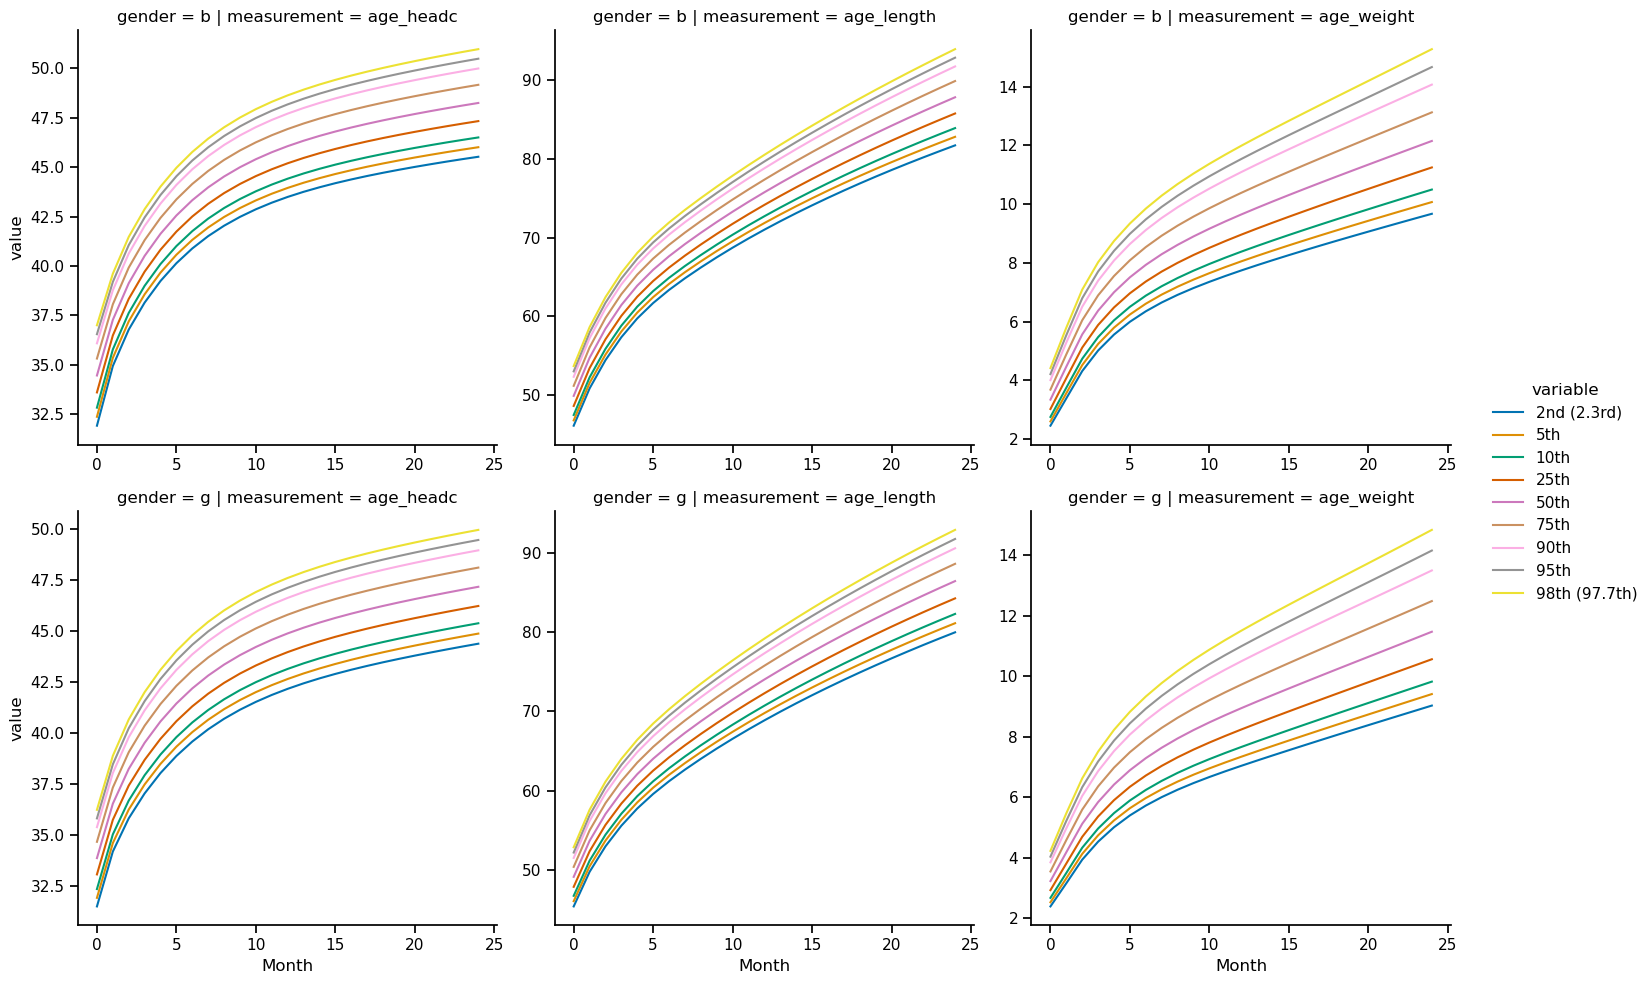

In [10]:
g = sns.relplot(
    data=data_df.melt(id_vars=["measurement", "Month", "gender"]),
    x="Month",
    y="value",
    hue="variable",
    col="measurement",
    row="gender",
    kind="line",
    facet_kws={"sharex": False, "sharey": False},
)

g.tight_layout()

# Learning polars

In [11]:
gh_url_stem = "https://raw.githubusercontent.com/dqsis/child-growth-charts/refs/heads/master/data/"
fn = "b_age_headc.csv"

data_df = pl.read_csv(f"{gh_url_stem}{fn}")
data_df

Month,2nd (2.3rd),5th,10th,25th,50th,75th,90th,95th,98th (97.7th)
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,31.92128,32.37241,32.83389,33.60502,34.4618,35.31858,36.08971,36.55119,37.002324
1,34.94019,35.35495,35.77923,36.48819,37.2759,38.06361,38.77257,39.19685,39.611608
2,36.78314,37.19961,37.62565,38.33754,39.1285,39.91946,40.63135,41.05739,41.473862
3,38.14913,38.56898,38.99847,39.71613,40.5135,41.31087,42.02853,42.45802,42.877868
4,39.24371,39.66775,40.10153,40.82636,41.6317,42.43704,43.16187,43.59565,44.019694
…,…,…,…,…,…,…,…,…,…
20,45.01543,45.4907,45.97688,46.78927,47.6919,48.59453,49.40692,49.8931,50.368369
21,45.15215,45.62958,46.11798,46.93407,47.8408,48.74753,49.56362,50.05202,50.529453
22,45.28376,45.76313,46.2535,47.07289,47.9833,48.89371,49.7131,50.20347,50.68284


In [12]:
# print shows a different format
print(data_df)

shape: (25, 10)
┌───────┬─────────────┬──────────┬──────────┬───┬──────────┬──────────┬──────────┬───────────────┐
│ Month ┆ 2nd (2.3rd) ┆ 5th      ┆ 10th     ┆ … ┆ 75th     ┆ 90th     ┆ 95th     ┆ 98th (97.7th) │
│ ---   ┆ ---         ┆ ---      ┆ ---      ┆   ┆ ---      ┆ ---      ┆ ---      ┆ ---           │
│ i64   ┆ f64         ┆ f64      ┆ f64      ┆   ┆ f64      ┆ f64      ┆ f64      ┆ f64           │
╞═══════╪═════════════╪══════════╪══════════╪═══╪══════════╪══════════╪══════════╪═══════════════╡
│ 0     ┆ 31.92128    ┆ 32.37241 ┆ 32.83389 ┆ … ┆ 35.31858 ┆ 36.08971 ┆ 36.55119 ┆ 37.002324     │
│ 1     ┆ 34.94019    ┆ 35.35495 ┆ 35.77923 ┆ … ┆ 38.06361 ┆ 38.77257 ┆ 39.19685 ┆ 39.611608     │
│ 2     ┆ 36.78314    ┆ 37.19961 ┆ 37.62565 ┆ … ┆ 39.91946 ┆ 40.63135 ┆ 41.05739 ┆ 41.473862     │
│ 3     ┆ 38.14913    ┆ 38.56898 ┆ 38.99847 ┆ … ┆ 41.31087 ┆ 42.02853 ┆ 42.45802 ┆ 42.877868     │
│ 4     ┆ 39.24371    ┆ 39.66775 ┆ 40.10153 ┆ … ┆ 42.43704 ┆ 43.16187 ┆ 43.59565 ┆ 44.019694 

In [13]:
# scanning and filtering
q = pl.scan_csv(f"{gh_url_stem}{fn}").filter(pl.col("Month") > 6)
q

In [14]:
filtered_data_df = q.collect()
filtered_data_df

Month,2nd (2.3rd),5th,10th,25th,50th,75th,90th,95th,98th (97.7th)
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
7,41.51388,41.95185,42.39988,43.14851,43.9803,44.81209,45.56072,46.00875,46.446715
8,42.03988,42.48206,42.93439,43.69022,44.53,45.36978,46.12561,46.57794,47.020118
9,42.48701,42.93322,43.38967,44.15237,44.9998,45.84723,46.60993,47.06638,47.512589
10,42.8715,43.3214,43.78163,44.55065,45.4051,46.25955,47.02857,47.4888,47.938705
11,43.20496,43.65819,44.12182,44.89654,45.7573,46.61806,47.39278,47.85641,48.309642
…,…,…,…,…,…,…,…,…,…
20,45.01543,45.4907,45.97688,46.78927,47.6919,48.59453,49.40692,49.8931,50.368369
21,45.15215,45.62958,46.11798,46.93407,47.8408,48.74753,49.56362,50.05202,50.529453
22,45.28376,45.76313,46.2535,47.07289,47.9833,48.89371,49.7131,50.20347,50.68284


In [15]:
# analogous to melt
data_df_m = data_df.unpivot(index="Month").rename({"variable": "percentile"})

# using glimpse to preview
data_df_m.glimpse()

Rows: 225
Columns: 3
$ Month      <i64> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
$ percentile <str> '2nd (2.3rd)', '2nd (2.3rd)', '2nd (2.3rd)', '2nd (2.3rd)', '2nd (2.3rd)', '2nd (2.3rd)', '2nd (2.3rd)', '2nd (2.3rd)', '2nd (2.3rd)', '2nd (2.3rd)'
$ value      <f64> 31.92128, 34.94019, 36.78314, 38.14913, 39.24371, 40.14288, 40.88935, 41.51388, 42.03988, 42.48701



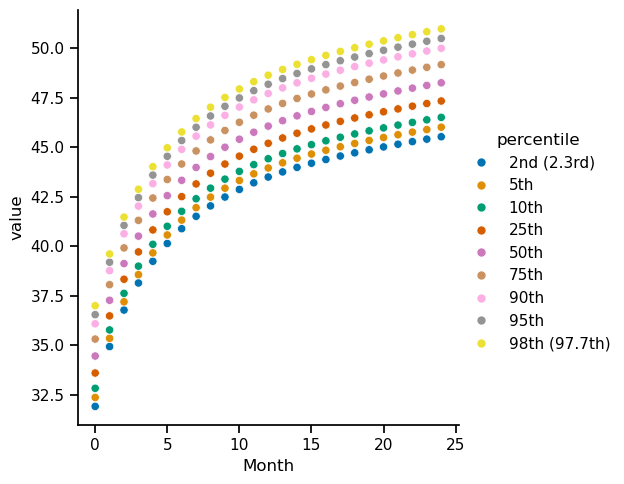

In [16]:
# plots with seaborn
sns.relplot(data=data_df_m, x="Month", y="value", hue="percentile")

In [18]:
data_df_m

Month,percentile,value
i64,str,f64
0,"""2nd (2.3rd)""",31.92128
1,"""2nd (2.3rd)""",34.94019
2,"""2nd (2.3rd)""",36.78314
3,"""2nd (2.3rd)""",38.14913
4,"""2nd (2.3rd)""",39.24371
…,…,…
20,"""98th (97.7th)""",50.368369
21,"""98th (97.7th)""",50.529453
22,"""98th (97.7th)""",50.68284


## Using external dataset

Following [this pandas vs. polars example](https://www.statology.org/pandas-vs-polars-performance-benchmarks-for-common-data-operations/).

In [19]:
# Fetch the dataset
covtype_data = fetch_covtype()
X = covtype_data.data
y = covtype_data.target

# Convert to Pandas DataFrame
df_pandas = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df_pandas["target"] = y

# Convert to Polars DataFrame
df_polars = pl.DataFrame(df_pandas)

In [23]:
df_pandas.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [47]:
df_pandas.shape

(581012, 55)

In [24]:
df_pandas["target"].nunique()

7

In [25]:
%%timeit

x = 1

8.41 ns ± 0.00645 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


In [45]:
%%timeit
df_pandas.groupby("target")["feature_0"].mean()

12.4 ms ± 408 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [46]:
%%timeit
df_polars.group_by("target").agg(pl.col("feature_0").mean())

1.64 ms ± 716 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [52]:
np.dot([1, -1, 0], [0, 1, -1])

np.int64(-1)

In [49]:
np.dot([1, -1, 0], [-1, 0, 1])

np.int64(-1)

In [51]:
nums = [0, 1, 2, 4, 5, 7]
for i in range(nums[0], nums[-1] + 1):
    print(i)

0
1
2
3
4
5
6
7


In [17]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Wed Jan 08 2025

Python implementation: CPython
Python version       : 3.11.10
IPython version      : 8.29.0

pandas         : 2.2.3
polars         : 1.19.0
seaborn        : 0.13.2
ydata_profiling: 0.0.dev0
numpy          : 2.0.2
matplotlib     : 3.9.2

Watermark: 2.5.0

